In [18]:
#import library

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from pandas_datareader import data
from datetime import datetime as dt

In [19]:
from __future__ import division

In [32]:
list = ['BABA','JNJ','HSBC','KO']

In [33]:
end = dt.now()
start = dt(end.year-1,end.month,end.day)

In [34]:

#for loop for grabing yahoo finance data and create a dataframe

for stock in list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)
    

In [35]:
#Summary Statistic

BABA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,198.636810,193.791425,196.391623,196.336865,1.696477e+07,196.336865
std,21.386158,20.958247,21.226411,21.258102,7.330194e+06,21.258102
min,157.229996,151.850006,155.029999,153.669998,5.523000e+06,153.669998
25%,178.957504,175.369747,177.180000,177.107498,1.197718e+07,177.107498
50%,200.389999,195.229996,198.169998,198.370003,1.520565e+07,198.370003
75%,215.545002,210.878746,213.652500,213.877499,1.963342e+07,213.877499
max,268.000000,255.910004,265.549988,261.579987,5.197930e+07,261.579987


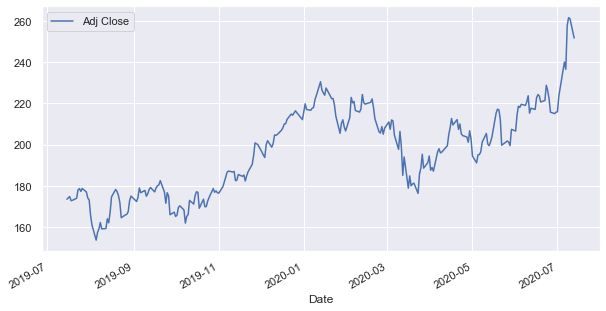

In [36]:
BABA['Adj Close'].plot(legend=True,figsize=(10,5))

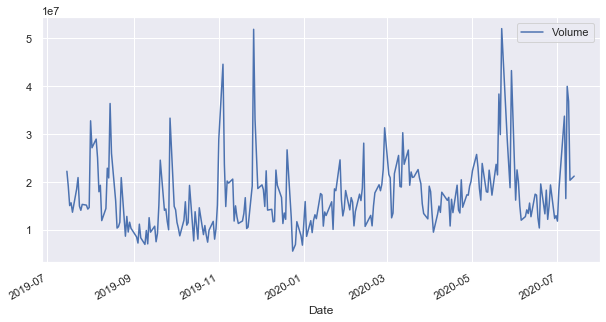

In [37]:
#total volume of stock being traded each day over the past year

BABA['Volume'].plot(legend=True,figsize=(10,5))

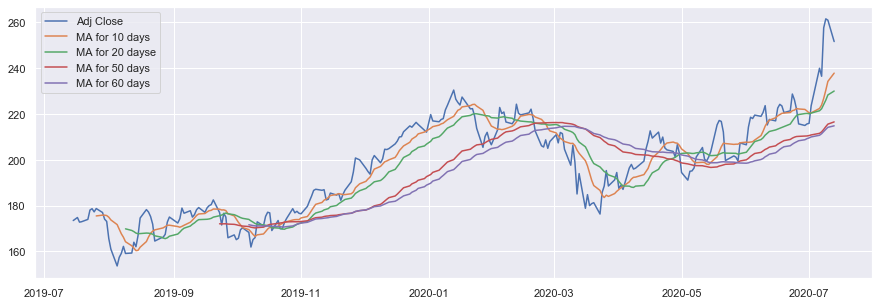

In [38]:
#caculating the moving average for the stock
# use rolling method to compute moving averages

BABA['MA for 10 days'] = BABA.Close.rolling(10).mean()
BABA['MA for 20 days'] = BABA.Close.rolling(20).mean()
BABA['MA for 50 days'] = BABA.Close.rolling(50).mean()
BABA['MA for 60 days'] = BABA.Close.rolling(60).mean()

plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(BABA['Adj Close'], label ='Adj Close')
plt.plot(BABA['MA for 10 days'], label ='MA for 10 days')
plt.plot(BABA['MA for 20 days'], label ='MA for 20 dayse')
plt.plot(BABA['MA for 50 days'], label ='MA for 50 days')
plt.plot(BABA['MA for 60 days'], label ='MA for 60 days')
plt.legend(loc=2)

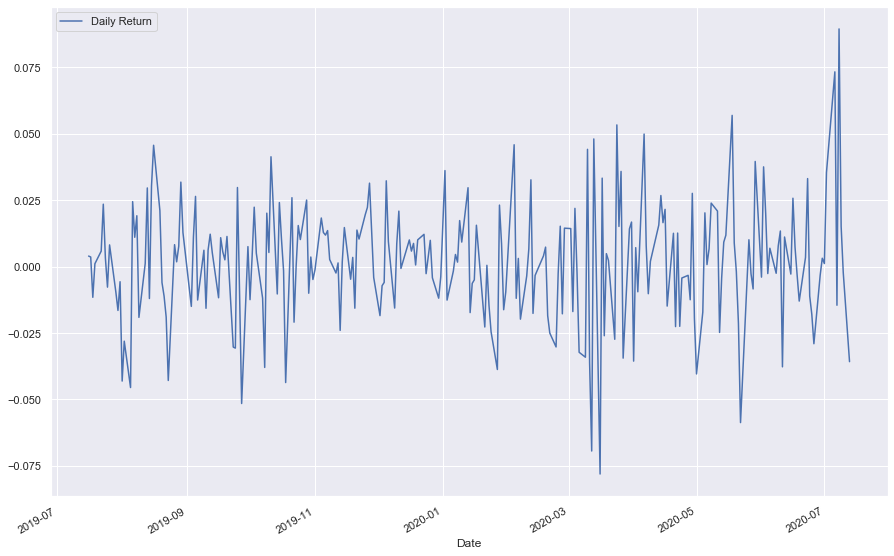

In [39]:
#this means is on any given day what was your percent return on your money

BABA['Daily Return'] = BABA['Adj Close'].pct_change()
BABA['Daily Return'].plot(figsize=(15,10),legend=True,grid=True)

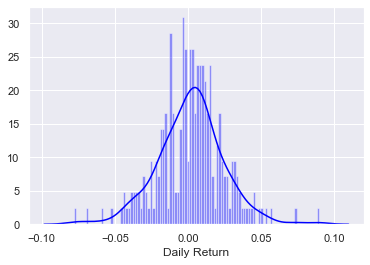

In [40]:
#the average daily return for the past year

sns.distplot(BABA['Daily Return'].dropna(), bins=100, color = 'blue')

In [41]:
closing_df = data.DataReader(list,'yahoo',start,end)['Adj Close']
returns = closing_df.pct_change()
returns.head()


Symbols,BABA,JNJ,HSBC,KO
Date,,,,
2019-07-15,NaN,NaN,NaN,NaN
2019-07-16,0.003977,-0.016406,-0.004796,0.000192
2019-07-17,0.003617,-0.004830,-0.006506,0.000767
2019-07-18,-0.011555,0.001593,0.004851,-0.002875
2019-07-19,0.001100,-0.013326,-0.002172,-0.012301


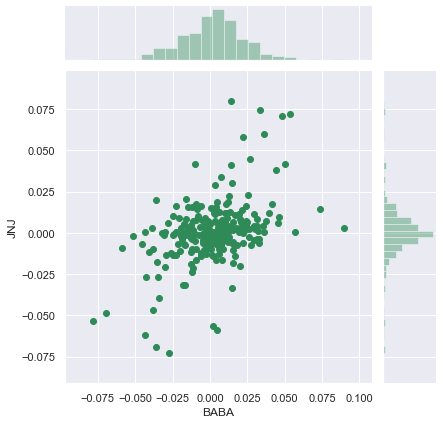

In [42]:
#compare 2 different stocks

sns.jointplot('BABA','JNJ',returns,kind='scatter', color ='seagreen')

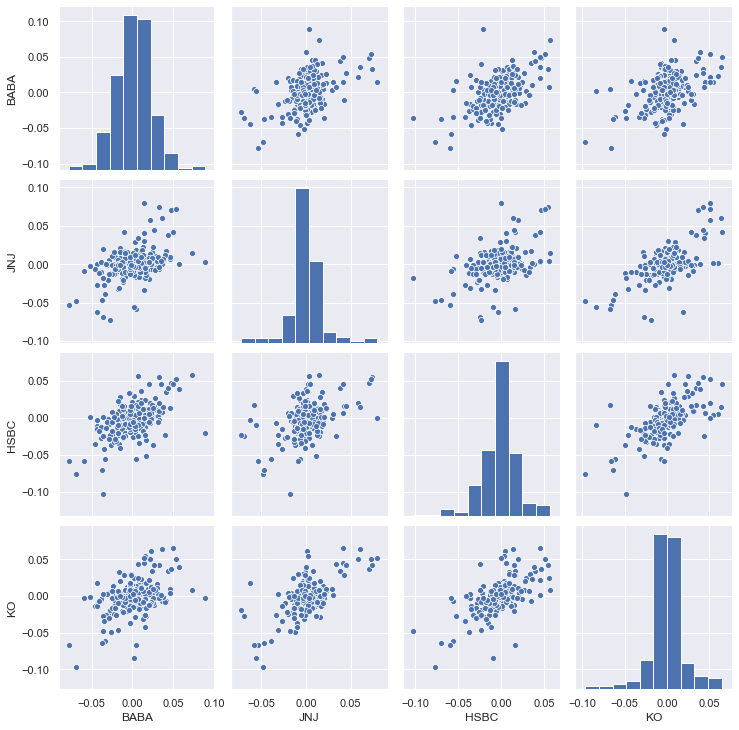

In [43]:
#create a comparison analysis plot using pairplot

sns.pairplot(returns.dropna())

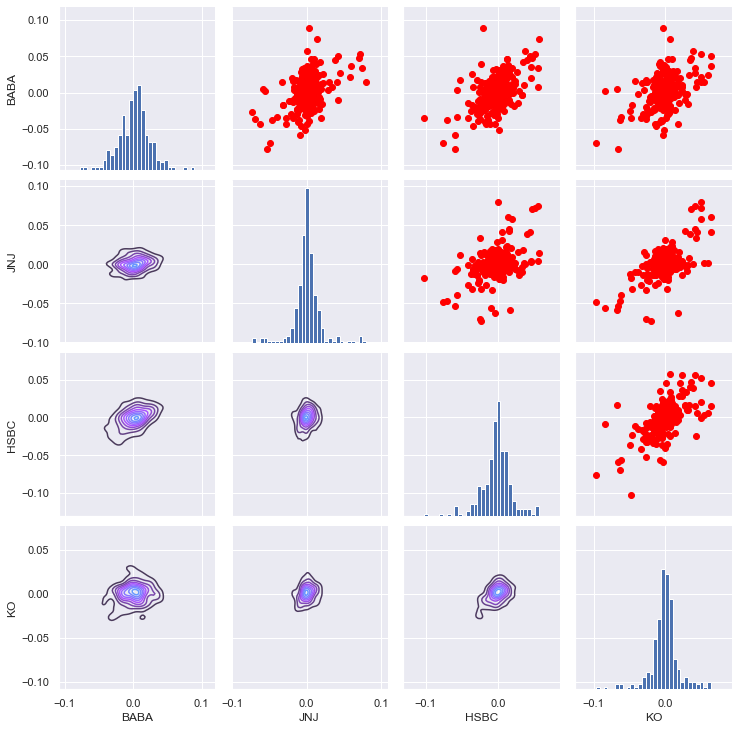

In [44]:
returns_fig = sns.PairGrid(returns.dropna())
returns_fig.map_upper(plt.scatter,color = 'red')
returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

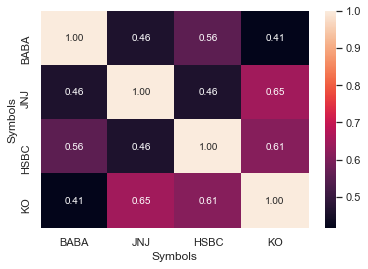

In [45]:
rets_corr= returns.dropna().corr()
sns.heatmap(rets_corr, annot=True, fmt='.2f')
plt.show()

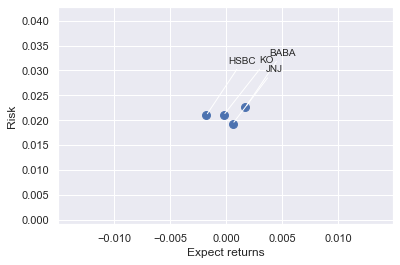

In [46]:
rets = returns.dropna()
#expect returns

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s= area)

plt.xlabel('Expect returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(label, xy =(x,y) , xytext = (50,50),textcoords = 'offset points', ha ='right', va = 'bottom', arrowprops = dict(arrowstyle = '-'))

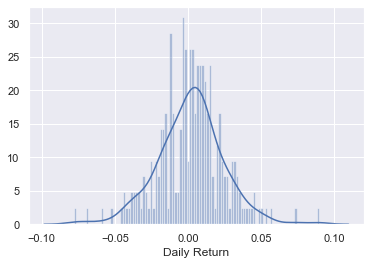

In [48]:
sns.distplot(BABA['Daily Return'].dropna(),bins=100)

In [49]:
rets['BABA'].quantile(0.05)
#value at risk is 3,6% of your investment

-0.036013079032440776